In [1]:
# Get the dataset (Comment if running locally)
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
!wget https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip

# Unzip the dataset
!unzip -q /content/BelgiumTSC_Training.zip
!unzip -q /content/BelgiumTSC_Testing.zip

--2021-07-13 01:14:00--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 174298785 (166M) [application/zip]
Saving to: ‘BelgiumTSC_Training.zip’

BelgiumTSC_Training 100%[===================>] 166.22M  8.16MB/s    in 21s     

2021-07-13 01:14:22 (7.81 MB/s) - ‘BelgiumTSC_Training.zip’ saved [174298785/174298785]

--2021-07-13 01:14:26--  https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip
Resolving btsd.ethz.ch (btsd.ethz.ch)... 129.132.52.168, 2001:67c:10ec:36c2::168
Connecting to btsd.ethz.ch (btsd.ethz.ch)|129.132.52.168|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77877833 (74M) [application/zip]
Saving to: ‘BelgiumTSC_Testing.zip’

BelgiumTSC_Testing. 100%[===================>]  74.27M  8.04MB/s    in 9.9s    


In [ ]:
# Use TensorFlow v1
%tensorflow_version 1.x

In [ ]:
# Import statements
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from skimage import transform
from skimage.io import imread
from skimage.color import rgb2gray

In [ ]:
# Global variables
train_data_dir = "Training"
test_data_dir = "Testing"

In [ ]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(imread(f))
            labels.append(int(d))
    return images, labels

In [ ]:
# Load images
images, labels = load_data(train_data_dir)

In [ ]:
# Create an array out of the images
images_array = np.array(images, dtype=object)
labels_array = np.array(labels, dtype=object)

# Print the shapes of the arrays
print(np.shape(images_array))
print(np.shape(labels_array))

# Count the number of labels
num_labels = len(set(labels_array))
print(f"{num_labels} labels")

(4575,)
(4575,)
62 labels


# Data Visualization

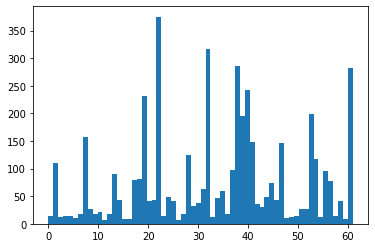

In [ ]:
# Make a histogram with 62 bins of the labels data
plt.hist(labels, num_labels)

# Show the plot
plt.show()

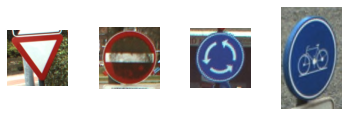

In [ ]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [ ]:
def displayImages(images):
  # Determine the (random) indexes of the images
  traffic_signs = [300, 2250, 3650, 4000]

  # Fill out the subplots with the random images and add shape, min and max values
  for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

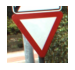

shape: (177, 191, 3), min: 4, max: 255


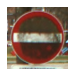

shape: (111, 109, 3), min: 7, max: 255


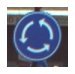

shape: (81, 82, 3), min: 28, max: 255


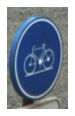

shape: (142, 85, 3), min: 16, max: 255


In [ ]:
displayImages(images)

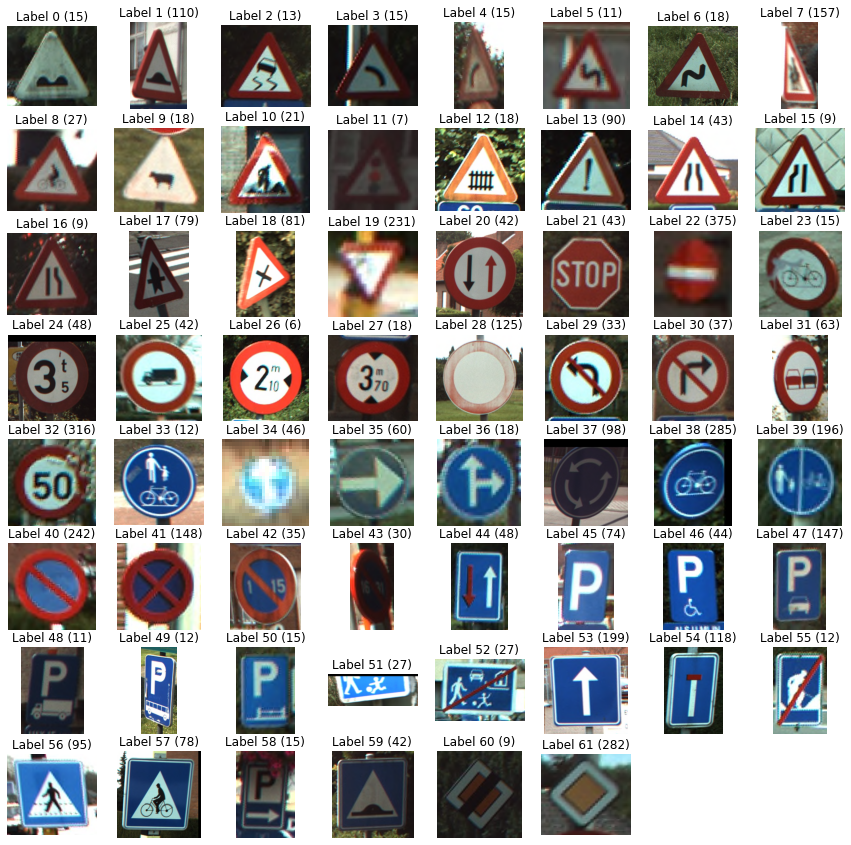

In [ ]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
  # You pick the first image for each label
  image = images[labels.index(label)]
  # Define 64 subplots 
  plt.subplot(8, 8, i)
  # Don't include axes
  plt.axis('off')
  # Add a title to each subplot 
  plt.title("Label {0} ({1})".format(label, labels.count(label)))
  # Add 1 to the counter
  i += 1
  # And you plot this first image 
  plt.imshow(image)
    
# Show the plot
plt.show()

# Feature Extraction

In [ ]:
# Resize images to 32x32
img_size = 32
images32 = [transform.resize(image, (img_size, img_size)) for image in images]
images32 = np.array(images32)

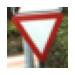

shape: (32, 32, 3), min: 0.07058823529411765, max: 0.996078431372549


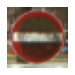

shape: (32, 32, 3), min: 0.07178596047794124, max: 0.9802341835171569


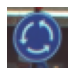

shape: (32, 32, 3), min: 0.12984068627450962, max: 0.9921568627450981


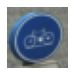

shape: (32, 32, 3), min: 0.10196078431372549, max: 0.8915900735294122


In [ ]:
# Show the resized images
displayImages(images32)

In [ ]:
# Convert to grayscale
images32_gray = rgb2gray(np.array(images32))

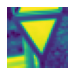

shape: (32, 32), min: 0.11104439060585156, max: 0.9952450980392157


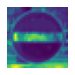

shape: (32, 32), min: 0.14307071078431374, max: 0.9639234636374081


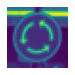

shape: (32, 32), min: 0.15592329101562497, max: 0.9886744424019608


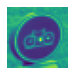

shape: (32, 32), min: 0.1289777699908088, max: 0.7500382272518378


In [ ]:
# Show the resized images
displayImages(images32_gray)

# Creating the model

In [ ]:
# Create placeholders for input data (X) and labels (y)
X = tf.placeholder(dtype = tf.float32, shape = [None, img_size, img_size])
y = tf.placeholder(dtype = tf.int32, shape = [None])

# Add a flatten layer to the model
images_flat = tf.contrib.layers.flatten(X)

# Add a fully connected layer with 128 neurons and the ReLu activation function
logits = tf.contrib.layers.fully_connected(images_flat, 128, tf.nn.relu)

# Add the loss function that computes sparse softmax cross entropy between logits and labels
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))

# Add the Adam optimizer with a learning rate of 0.001. The optimizer's goal is to minimize the loss function
train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

# Add the accuracy function that computes the accuracy of the model
correct_pred = tf.argmax(logits, 1)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

print("images_flat: ", images_flat)
print("logits: ", logits)
print("loss: ", loss)
print("predicted_labels: ", correct_pred)

images_flat:  Tensor("Flatten_9/flatten/Reshape:0", shape=(?, 1024), dtype=float32)
logits:  Tensor("fully_connected_4/Relu:0", shape=(?, 128), dtype=float32)
loss:  Tensor("Mean_8:0", shape=(), dtype=float32)
predicted_labels:  Tensor("ArgMax_4:0", shape=(?,), dtype=int64)


In [ ]:
# Create a new TF session
session = tf.Session()  

In [ ]:
session.run(tf.global_variables_initializer())

for i in range(1000):
  _, accuracy_val = session.run([train_op, accuracy], feed_dict={X: images32_gray, y: labels})
  if (i + 1) % 10 == 0:
    print(f"Epoch {i + 1}/{epochs}")

Epoch 10/1000
Epoch 20/1000
Epoch 30/1000
Epoch 40/1000
Epoch 50/1000
Epoch 60/1000
Epoch 70/1000
Epoch 80/1000
Epoch 90/1000
Epoch 100/1000
Epoch 110/1000
Epoch 120/1000
Epoch 130/1000
Epoch 140/1000
Epoch 150/1000
Epoch 160/1000
Epoch 170/1000
Epoch 180/1000
Epoch 190/1000
Epoch 200/1000
Epoch 210/1000
Epoch 220/1000
Epoch 230/1000
Epoch 240/1000
Epoch 250/1000
Epoch 260/1000
Epoch 270/1000
Epoch 280/1000
Epoch 290/1000
Epoch 300/1000
Epoch 310/1000
Epoch 320/1000
Epoch 330/1000
Epoch 340/1000
Epoch 350/1000
Epoch 360/1000
Epoch 370/1000
Epoch 380/1000
Epoch 390/1000
Epoch 400/1000
Epoch 410/1000
Epoch 420/1000
Epoch 430/1000
Epoch 440/1000
Epoch 450/1000
Epoch 460/1000
Epoch 470/1000
Epoch 480/1000
Epoch 490/1000
Epoch 500/1000
Epoch 510/1000
Epoch 520/1000
Epoch 530/1000
Epoch 540/1000
Epoch 550/1000
Epoch 560/1000
Epoch 570/1000
Epoch 580/1000
Epoch 590/1000
Epoch 600/1000
Epoch 610/1000
Epoch 620/1000
Epoch 630/1000
Epoch 640/1000
Epoch 650/1000
Epoch 660/1000
Epoch 670/1000
Epoc

# Evaluating the model

In [ ]:
# Pick 10 random images
sample_indexes = random.sample(range(len(images32_gray)), 10)
sample_images = [images32_gray[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Run the "predicted_labels" op.
predicted = session.run([correct_pred], feed_dict={X: sample_images})[0]
                        
# Print the real and predicted labels
print(f"Real Labels     : {sample_labels}")
print(f"Predicted Labels: {predicted.tolist()}")

Real Labels     : [61, 22, 19, 42, 32, 36, 32, 59, 19, 38]
Predicted Labels: [61, 22, 19, 42, 32, 38, 32, 59, 19, 38]


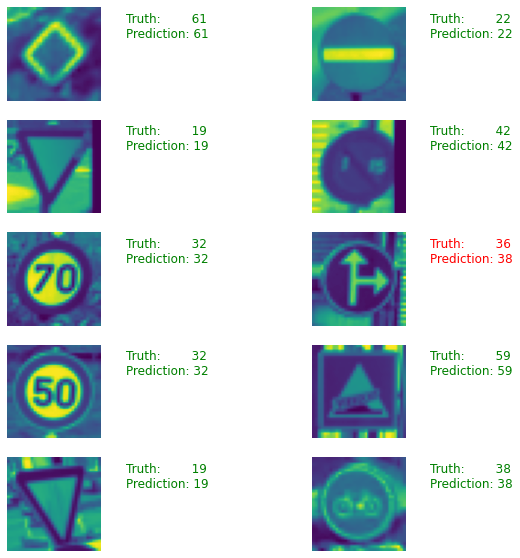

In [ ]:
# Display the predictions and the ground truth visually.
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    plt.subplot(5, 2,1+i)
    plt.axis('off')
    color='green' if truth == prediction else 'red'
    plt.text(40, 10, "Truth:        {0}\nPrediction: {1}".format(truth, prediction), 
             fontsize=12, color=color)
    plt.imshow(sample_images[i])

plt.show()

In [ ]:
# Load the test data
test_images, test_labels = load_data(test_data_dir)

# Transform the images to 32x32 pixels
test_images32 = [transform.resize(image, (img_size, img_size)) for image in test_images]

# Convert to grayscale
from skimage.color import rgb2gray
test_images32 = rgb2gray(np.array(test_images32))

# Run predictions against the full test set.
predicted = session.run([correct_pred], feed_dict={X: test_images32})[0]

# Calculate correct matches 
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate the accuracy
accuracy = match_count / len(test_labels)

# Print the accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.813


In [ ]:
# Close the TF session
session.close()